## Homework 1 - Data Exploration using Census Data

In this homework assignment you will use census data from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. A copy of this dataset is located at UCI Machine Learning repository, please see this [link](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29) to reach to the dataset website.

This dataset contains census data extracted from the 1994 and 1995 Current Population Surveys. We will only work with 'training' data (a link to that is provided to you below). The data contains 41 demographic and employment related variables. The abbreviated column names provided to you below. You are expected to read the documentation of this dataset, understand the features and preprocess this dataset. Additional information can be found [in the data description](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.html) and [additional comments](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.names).

Below you will find a code snippet to download and read the data into a pandas dataframe. You can alternatively download it yourself, extract and read it manually. The questions are shown in the subsequent cells. You can provide your answers in this file. Make sure to change the notebook's name and add your name before submitting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz'
census_dl_file = './census-income.data.gz'
urllib.request.urlretrieve(url, census_dl_file)

('./census-income.data.gz', <http.client.HTTPMessage at 0x1b35f0a2dc0>)

In [3]:
columns_abbr = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC',
                'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 
                'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 
                'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 
                'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVALB']

In [4]:
df = pd.read_csv('census-income.data.gz', compression='gzip', names=columns_abbr, sep=r',', skipinitialspace=True)
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [5]:
# you can see the DataFrame's info panel here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int64  
 1   ACLSWKR   199523 non-null  object 
 2   ADTIND    199523 non-null  int64  
 3   ADTOCC    199523 non-null  int64  
 4   AHGA      199523 non-null  object 
 5   AHRSPAY   199523 non-null  int64  
 6   AHSCOL    199523 non-null  object 
 7   AMARITL   199523 non-null  object 
 8   AMJIND    199523 non-null  object 
 9   AMJOCC    199523 non-null  object 
 10  ARACE     199523 non-null  object 
 11  AREORGN   198649 non-null  object 
 12  ASEX      199523 non-null  object 
 13  AUNMEM    199523 non-null  object 
 14  AUNTYPE   199523 non-null  object 
 15  AWKSTAT   199523 non-null  object 
 16  CAPGAIN   199523 non-null  int64  
 17  CAPLOSS   199523 non-null  int64  
 18  DIVVAL    199523 non-null  int64  
 19  FILESTAT  199523 non-null  object 
 20  GRIN

In [6]:
# Working Dataframe making

# Creatinglist of int and float attributes
dtype_int=['AAGE','YEAR','WKSWORK']
dtype_float=['AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','MARSUPWT']


"""num='AAGE':int
,'AHRSPAY':float
,'CAPGAIN':float
,'CAPLOSS':float
,'DIVVAL':float
,'WKSWORK':int
,'YEAR':int
,'MARSUPWT':float
"""
string=['ACLSWKR'
,'ADTIND'
,'ADTOCC'
,'AHGA'
,'AHSCOL'
,'AMARITL'
,'AMJIND'
,'AMJOCC'
,'ARACE'
,'AREORGN'
,'AUNMEM'
,'AUNTYPE'
,'AWKSTAT'
,'FILESTAT'
,'GRINREG'
,'GRINST'
,'HHDFMX'
,'HHDREL'
,'MIGMTR1'
,'MIGMTR3'
,'MIGMTR4'
,'MIGSAME'
,'MIGSUN'
,'NOEMP'
,'PARENT'
,'PEFNTVTY'
,'PEMNTVTY'
,'PENATVTY'
,'PRCITSHP'
,'PTOTVALB'
,'SEOTR'
,'VETQVA'
,'VETYN',
'ASEX']

# Changing data types
for i in string:
    df[i] = df[i].astype(str)
for i in dtype_int:
    df[i] = df[i].astype(int)
for i in dtype_float:
    df[i] = df[i].astype(float)

In [7]:
#df.info()
df.describe(include=object)

,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,PTOTVALB
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,52,47,17,3,7,24,15,5,10,...,7,5,43,43,43,5,3,3,3,2
top,Not in universe,0,0,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,- 50000.
freq,100245,100684,100684,48407,186943,86485,100684,100684,167365,171907,...,95983,144232,159163,160479,176989,176992,180672,197539,150130,187141


In [8]:
pd.set_option("display.max_columns", 100)

In [9]:
# Creating Df for feature and its datatypes
data_types = pd.DataFrame(df.dtypes)

data_types = data_types.rename_axis('Feature Name').reset_index()
data_types.columns =['FeatureName','DataType']
data_types

,FeatureName,DataType
0,AAGE,int32
1,ACLSWKR,object
2,ADTIND,object
3,ADTOCC,object
4,AHGA,object
5,AHRSPAY,float64
6,AHSCOL,object
7,AMARITL,object
8,AMJIND,object
9,AMJOCC,object


### Q1 - Identify the data scales and data types for each variable in census data. Identify the domain for each variable by checking the attributes' values. Then, create a data quality report for both categorical (nominal, ordinal) and continuous (interval, ratio) variables. [40 pts]

For data scales, identify whether an attribute is nominal, ordinal, interval or ratio scale.
For data types, identify the domain and provide an appropriate data type (integer, float, String, date, Boolean). See if that data type is correct in your dataframe.
For domain, inspect each distinct value for each attribute. Identify missing values. Also include the bar plots and histograms for visualizing the distributions. 

The examples for a continious and a categorical feature can be seen below. You do not need to use jupyter formatting provided here. You can print a DataFrame or read a csv, and display it. Make sure you have the csv in your zip file.

In [10]:
#creating dataframe of description and datascales
data = pd.read_csv('datatypes_raw.csv')
new=data["Columns"].str.split("(", expand = True)
new=new[1].str.split(")", expand = True)
new.rename(columns = {0:'Description', 1:'Datascale'}, inplace = True)
datatypes=new

In [11]:
datatypes

,Description,Datascale
0,age,continuous
1,class of worker,nominal
2,detailed industry recode,nominal
3,detailed occupation recode,nominal
4,education,ordinal
5,wage per hour,continuous
6,enroll in edu inst last wk,nominal
7,marital stat,nominal
8,major industry code,nominal
9,major occupation code,nominal


In [12]:
# Creating Final workable dataset along with description datascale and domain
final_df = pd.concat([data_types, datatypes], axis=1, join='inner')

domain=['Numerical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Numerical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Numerical'
,'Numerical'
,'Numerical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Numerical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Categorical'
,'Numerical'
,'Categorical'
,'Categorical']

final_df['Domain']=domain
final_df['Description']=final_df['Description'].str.capitalize()
final_df['Datascale'] = final_df['Datascale'].str.strip().astype(str).str.capitalize()


final_df



,FeatureName,DataType,Description,Datascale,Domain
0,AAGE,int32,Age,Continuous,Numerical
1,ACLSWKR,object,Class of worker,Nominal,Categorical
2,ADTIND,object,Detailed industry recode,Nominal,Categorical
3,ADTOCC,object,Detailed occupation recode,Nominal,Categorical
4,AHGA,object,Education,Ordinal,Categorical
5,AHRSPAY,float64,Wage per hour,Continuous,Numerical
6,AHSCOL,object,Enroll in edu inst last wk,Nominal,Categorical
7,AMARITL,object,Marital stat,Nominal,Categorical
8,AMJIND,object,Major industry code,Nominal,Categorical
9,AMJOCC,object,Major occupation code,Nominal,Categorical


In [13]:
#Exporting final df
final_df.to_csv ('datatypes_final.csv', index = False, header=True)

In [14]:
#Created separate lists of numerical and caegorical attrbiutes
numerical_list=final_df[final_df.Domain=='Numerical']['FeatureName'].tolist()
categorical_list=final_df[final_df.Domain=='Categorical']['FeatureName'].tolist()


In [15]:
numerical_list

['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'MARSUPWT', 'WKSWORK']

In [16]:
categorical_list

['ACLSWKR',
 'ADTIND',
 'ADTOCC',
 'AHGA',
 'AHSCOL',
 'AMARITL',
 'AMJIND',
 'AMJOCC',
 'ARACE',
 'AREORGN',
 'ASEX',
 'AUNMEM',
 'AUNTYPE',
 'AWKSTAT',
 'FILESTAT',
 'GRINREG',
 'GRINST',
 'HHDFMX',
 'HHDREL',
 'MIGMTR1',
 'MIGMTR3',
 'MIGMTR4',
 'MIGSAME',
 'MIGSUN',
 'NOEMP',
 'PARENT',
 'PEFNTVTY',
 'PEMNTVTY',
 'PENATVTY',
 'PRCITSHP',
 'SEOTR',
 'VETQVA',
 'VETYN',
 'YEAR',
 'PTOTVALB']

### Data Quality Report for Cont Variables

| Feature | Desc. | Count | % of Missing | Card. | Min. | Q1 | Median | Q3 | Max. | Mean | Std. Dev. | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| AAGE | Age | 199,523 | 0 | 91 | 0 | 15 | 33 | 50 | 90 | 34.49 | 22.31 |  |

In [17]:
#Continuous Dataframe Process

continuous_df = final_df.copy() 
continuous_df = continuous_df[continuous_df.Domain=='Numerical']
continuous_df = continuous_df[['FeatureName','Description']]
continuous_df = continuous_df.reset_index()

# Calculating MEAN,MEDIAN,MODE for Continuous 
for feature,values in df.iteritems():
    if feature in numerical_list:
        valueslen =  values.size
        continuous_df.at[continuous_df['FeatureName'] == feature,'Count'] = values.size
        continuous_df.at[continuous_df['FeatureName'] == feature,'% of Missing'] = ((values.isnull().sum()/values.size)*100).round(2)
        continuous_df.at[continuous_df['FeatureName'] == feature, 'Card.'] = int(values.unique().size)
        continuous_df.at[continuous_df['FeatureName'] == feature, 'Min.'] = min(values)
        continuous_df.at[continuous_df['FeatureName'] == feature, 'Q1'] = values.quantile(.25)
        continuous_df.at[continuous_df['FeatureName'] == feature, 'Median'] = values.median()
        continuous_df.at[continuous_df['FeatureName'] == feature, 'Q3'] = values.quantile(.75)
        continuous_df.at[continuous_df['FeatureName'] == feature, 'Max.'] = max(values)
        continuous_df.at[continuous_df['FeatureName'] == feature, 'Mean'] = round(values.mean(),2)
        continuous_df.at[continuous_df['FeatureName'] == feature, 'Std. Dev.'] = round(values.std(),2)

continuous_df  = continuous_df[['FeatureName','Description','Count','% of Missing','Card.','Min.','Q1','Median','Q3','Max.','Mean','Std. Dev.']]
continuous_df

,FeatureName,Description,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
0,AAGE,Age,199523.0,0.0,91.0,0.00,15.000,33.00,50.00,90.0,34.49,22.31
1,AHRSPAY,Wage per hour,199523.0,0.0,1240.0,0.00,0.000,0.00,0.00,9999.0,55.43,274.90
2,CAPGAIN,Capital gains,199523.0,0.0,132.0,0.00,0.000,0.00,0.00,99999.0,434.72,4697.53
3,CAPLOSS,Capital losses,199523.0,0.0,113.0,0.00,0.000,0.00,0.00,4608.0,37.31,271.90
4,DIVVAL,Dividends from stocks,199523.0,0.0,1478.0,0.00,0.000,0.00,0.00,99999.0,197.53,1984.16
5,MARSUPWT,Instance weight,199523.0,0.0,99800.0,37.87,1061.615,1618.31,2188.61,18656.3,1740.38,993.77
6,WKSWORK,Weeks worked in year,199523.0,0.0,53.0,0.00,0.000,8.00,52.00,52.0,23.17,24.41


# Graphs for Continuous variables

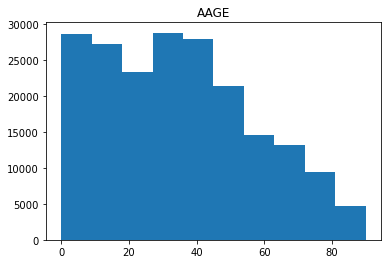

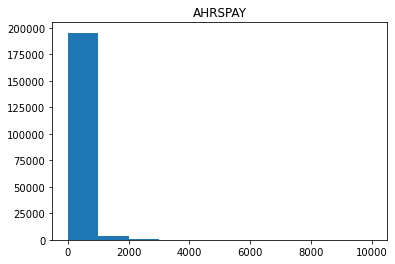

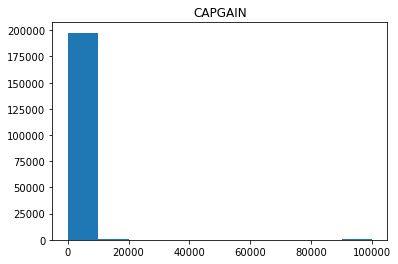

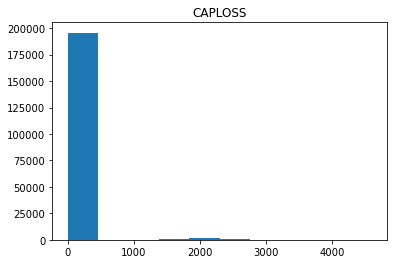

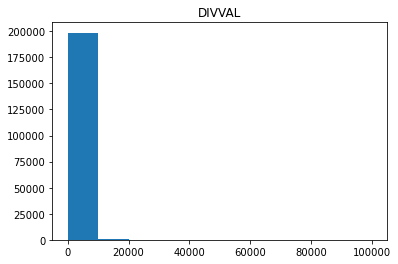

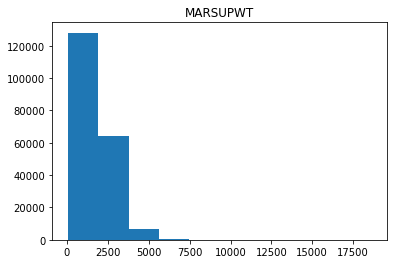

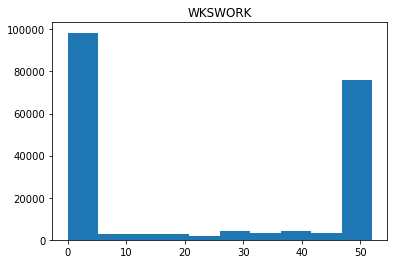

In [18]:
for i in numerical_list:
    plt.hist(df[i])
    plt.title(i)
    plt.show()


### Data Quality Report for Categorical Variables

| Feature | Desc. | Count | % of Missing | Card. | Mode | Mode Freq. | Mode % | 2nd Mode | 2nd Mode Freq. | 2nd Mode Perc | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| ACLSWKR | Class of worker | 199,523 | 0 | 9 | Not in Universe | 100,245 | 50.24 | Private | 72,028 |  36.10 |  |

In [19]:
# Creating categorical Dataframe
categorical_df = final_df.copy() 
categorical_df = categorical_df[categorical_df.Domain=='Categorical']
categorical_df = categorical_df.reset_index()
categorical_df

,index,FeatureName,DataType,Description,Datascale,Domain
0,1,ACLSWKR,object,Class of worker,Nominal,Categorical
1,2,ADTIND,object,Detailed industry recode,Nominal,Categorical
2,3,ADTOCC,object,Detailed occupation recode,Nominal,Categorical
3,4,AHGA,object,Education,Ordinal,Categorical
4,6,AHSCOL,object,Enroll in edu inst last wk,Nominal,Categorical
5,7,AMARITL,object,Marital stat,Nominal,Categorical
6,8,AMJIND,object,Major industry code,Nominal,Categorical
7,9,AMJOCC,object,Major occupation code,Nominal,Categorical
8,10,ARACE,object,Race,Nominal,Categorical
9,11,AREORGN,object,Hispanic origin,Nominal,Categorical


In [20]:
categorical_df = categorical_df[['FeatureName','Description']]
categorical_df

,FeatureName,Description
0,ACLSWKR,Class of worker
1,ADTIND,Detailed industry recode
2,ADTOCC,Detailed occupation recode
3,AHGA,Education
4,AHSCOL,Enroll in edu inst last wk
5,AMARITL,Marital stat
6,AMJIND,Major industry code
7,AMJOCC,Major occupation code
8,ARACE,Race
9,AREORGN,Hispanic origin


In [21]:
categorical_df.describe()

,FeatureName,Description
count,35,35
unique,35,35
top,AMJIND,Country of birth mother
freq,1,1


In [22]:
#categorical_df=categorical_df.assign('Count':'','% of Missing':'','Card.':'','Mode':'','Mode Freq.':'','Mode %':'','2nd Mode':'','2nd Mode Freq.':'','2nd Mode Perc':'','Notes':'')


for feature,values in df.iteritems():
    if feature in categorical_list:
        
        categorical_df.at[categorical_df['FeatureName'] == feature,'Count'] = values.size
        categorical_df.at[categorical_df['FeatureName'] == feature,'% of Missing'] = ((values.isnull().sum()/values.size)*100).round(2)
        categorical_df.at[categorical_df['FeatureName'] == feature, 'Card.'] = values.unique().size 
        
        categorical_df.at[categorical_df['FeatureName'] == feature, 'Mode'] = values.mode()[0]
        categorical_df.at[categorical_df['FeatureName'] == feature, 'Mode Freq.'] = len(df[df[feature] == values.mode()[0]])
        categorical_df.at[categorical_df['FeatureName'] == feature, 'Mode %'] = round((len(df[df[feature] == values.mode()[0]])/values.size)*100,2)
        
        firstmode=values.mode()[0]
        
        values = values[values!= firstmode]

        smodefreq=len(df[df[feature] == values.mode()[0]])
        
        categorical_df.at[categorical_df['FeatureName'] == feature, '2nd Mode'] = values.mode()[0]
        categorical_df.at[categorical_df['FeatureName'] == feature, '2nd Mode Freq.'] = len(df[df[feature] == values.mode()[0]])
        categorical_df.at[categorical_df['FeatureName'] == feature, '2nd Mode Perc'] = round((smodefreq/values.size)*100,2)

df['AREORGN'] = df.AREORGN.fillna('None') 
#categorical_df.columns = ['FeatureName','Description','Count','% of Missing','Card.','Mode','Mode Freq.','Mode %','2nd Mode','2nd Mode Freq.','2nd Mode Perc','Notes']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
categorical_df

,FeatureName,Description,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode Perc
0,ACLSWKR,Class of worker,199523.0,0.0,9.0,Not in universe,100245.0,50.24,Private,72028.0,72.55
1,ADTIND,Detailed industry recode,199523.0,0.0,52.0,0,100684.0,50.46,33,17070.0,17.27
2,ADTOCC,Detailed occupation recode,199523.0,0.0,47.0,0,100684.0,50.46,2,8756.0,8.86
3,AHGA,Education,199523.0,0.0,17.0,High school graduate,48407.0,24.26,Children,47422.0,31.38
4,AHSCOL,Enroll in edu inst last wk,199523.0,0.0,3.0,Not in universe,186943.0,93.69,High school,6892.0,54.79
5,AMARITL,Marital stat,199523.0,0.0,7.0,Never married,86485.0,43.35,Married-civilian spouse present,84222.0,74.51
6,AMJIND,Major industry code,199523.0,0.0,24.0,Not in universe or children,100684.0,50.46,Retail trade,17070.0,17.27
7,AMJOCC,Major occupation code,199523.0,0.0,15.0,Not in universe,100684.0,50.46,Adm support including clerical,14837.0,15.01
8,ARACE,Race,199523.0,0.0,5.0,White,167365.0,83.88,Black,20415.0,63.48
9,AREORGN,Hispanic origin,199523.0,0.0,10.0,All other,171907.0,86.16,Mexican-American,8079.0,29.25


# Graphs for Categorical Variables

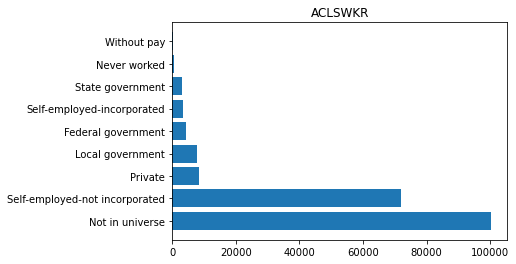

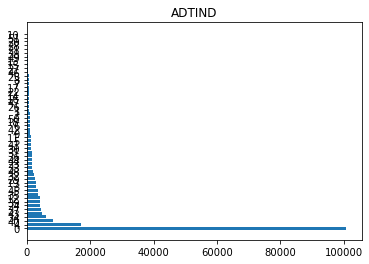

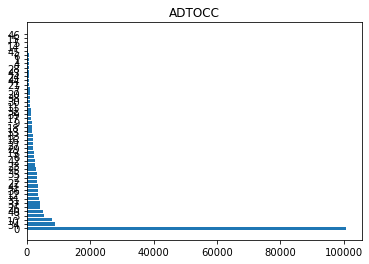

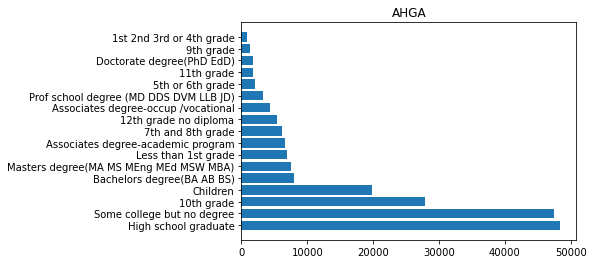

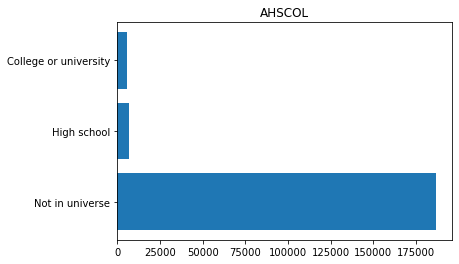

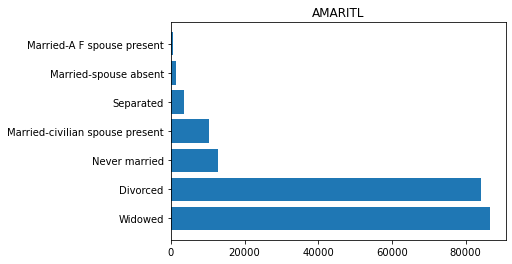

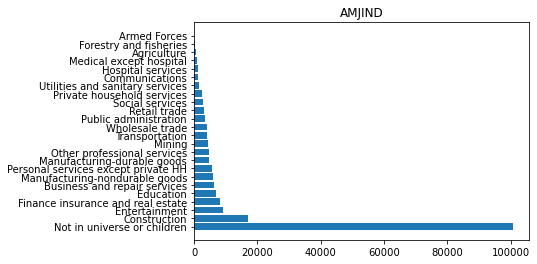

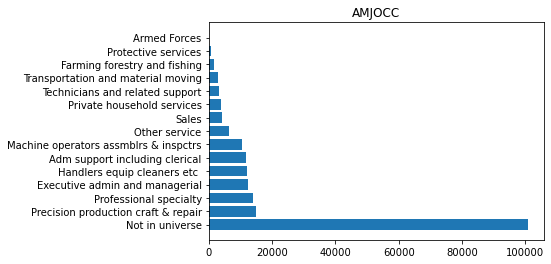

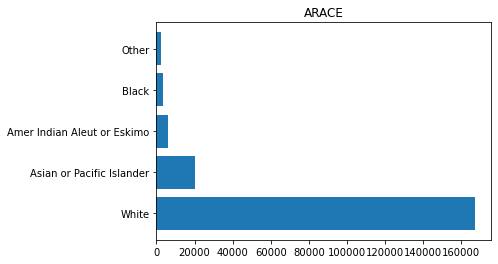

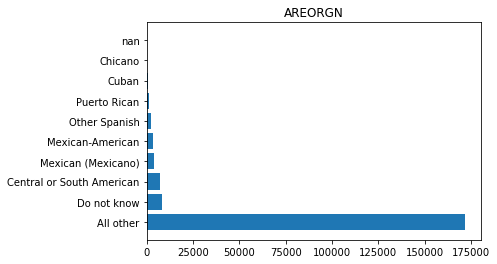

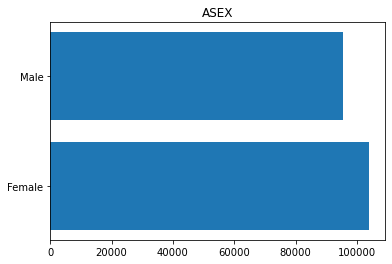

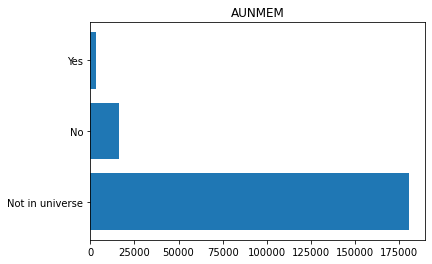

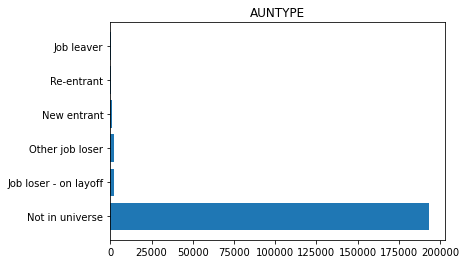

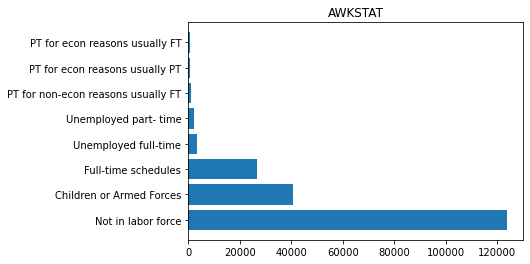

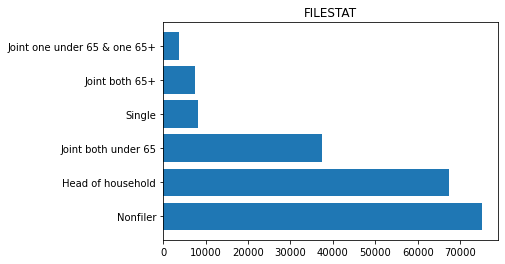

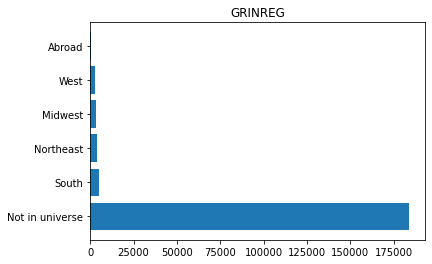

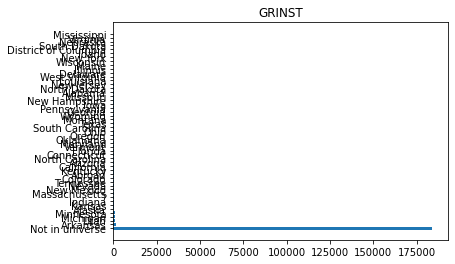

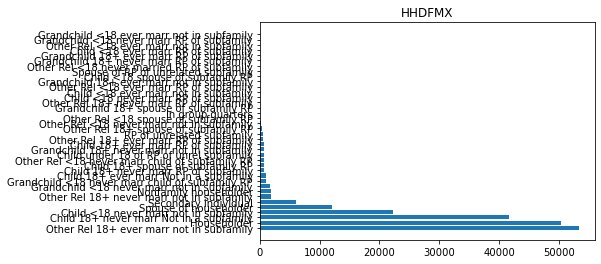

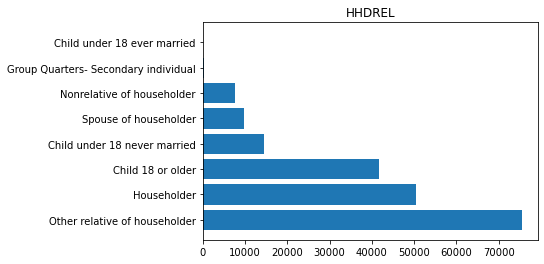

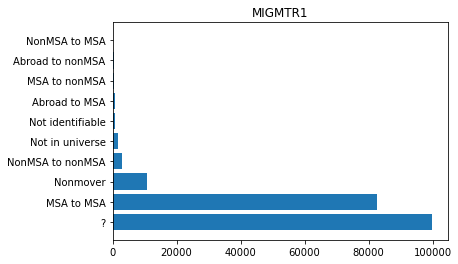

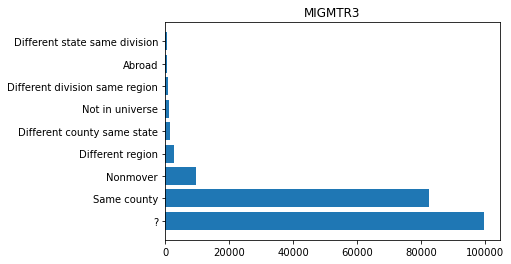

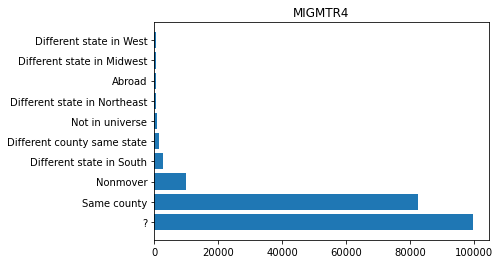

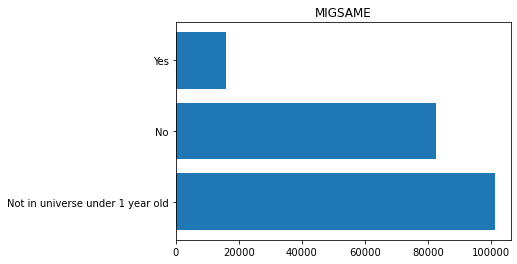

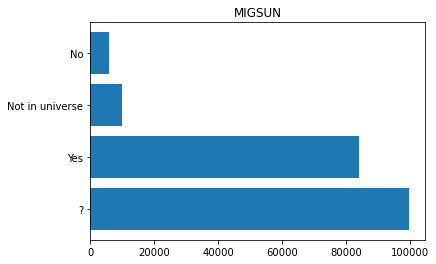

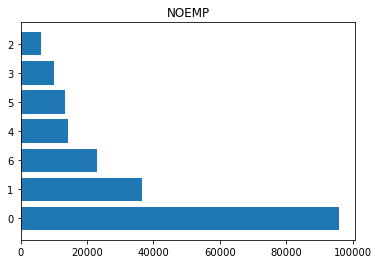

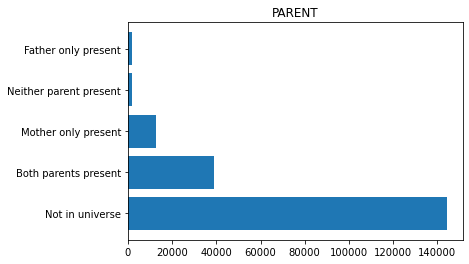

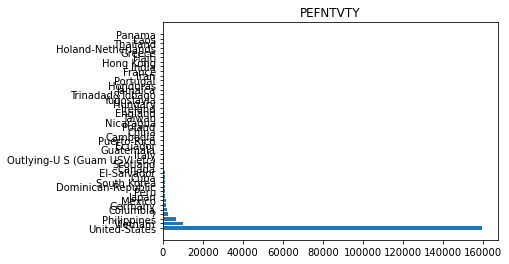

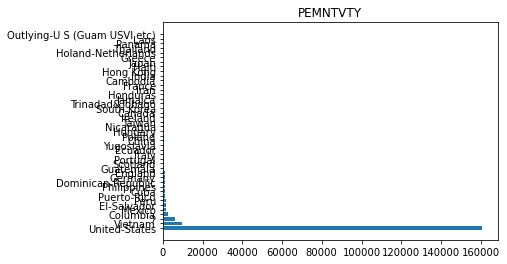

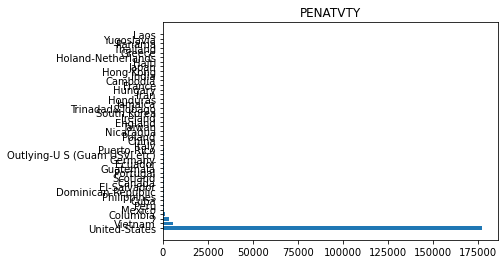

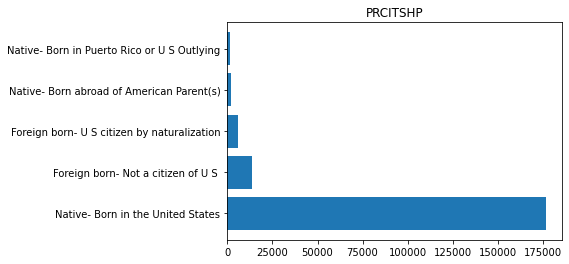

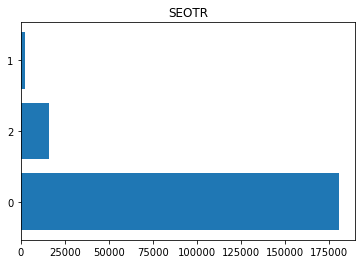

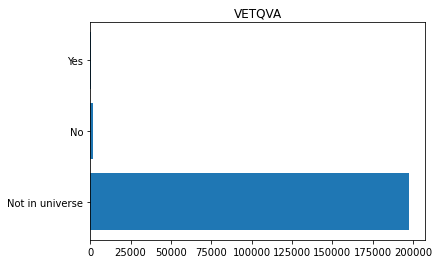

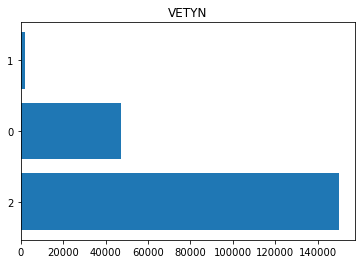

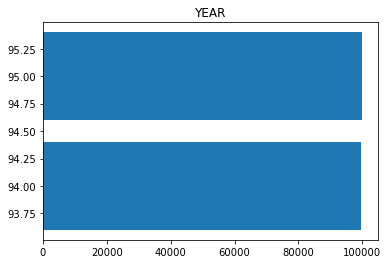

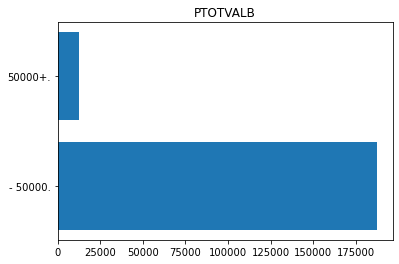

In [24]:


for i in categorical_list:
    #plt.figure(figsize = (10,6))
    plt.title(i,loc='center')
    x = df[i].unique()
    y = df[i].value_counts()
    plt.barh(x,y)
    plt.show()

### Q2 - Identify the data quality issues for each attribute. Create a data quality plan and implement the changes. [35 pts] 

Identify missing values, potential anomalies and outliers. Finally, remedy these issues.

In [25]:
#IQR CHECK

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [26]:
IQR

AAGE          35.000
AHRSPAY        0.000
CAPGAIN        0.000
CAPLOSS        0.000
DIVVAL         0.000
MARSUPWT    1126.995
WKSWORK       52.000
YEAR           1.000
dtype: float64

In [27]:
# your code goes here
dataqualityplan = pd.read_excel('DataQualityPlan.xlsx')

In [28]:
dataqualityplan

,FeatureName,Description,Data Quality Issue,Potential handling strategies,Reason
0,MIGMTR1,migration code-change in msa,Invalid data,Drop the feature,50% of data is invalid as per domain knowledge
1,MIGMTR3,migration code-change in reg,Invalid data,Drop the feature,50% of data is invalid as per domain knowledge
2,MIGSUN,migration prev res in sunbelt,Invalid data,Drop the feature,50% of data is invalid as per domain knowledge
3,MIGMTR4,migration code-move within reg,Invalid data,Drop the feature,50% of data is invalid as per domain knowledge
4,AREORGN,migration code-change in msa,Missing Data,Impute the data with mode of the feature,Missing data is 0.44% of complete data
5,AAGE,age,Outliers,Clamp transformations range( 0 - 102.5),using IQR Range
6,CAPGAIN,capital gains,Outliers,Drop the feature,IQR is zero
7,CAPLOSS,capital loss,Outliers,Drop the feature,IQR is zero
8,AHRSPAY,wage per hour,Outliers,Drop the feature,IQR is zero
9,DIVVAL,divdends from stocks,Outliers,Drop the feature,IQR is zero


In [29]:
dq = df.copy()
dq.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1',
       'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR', 'PTOTVALB'],
      dtype='object')

In [30]:
# Implementing changes as per DATA Quality Report
dq[dq.AAGE>1.5*35+50]['AAGE']=1.5*35+50

#Dropping Categorical Columns
dq.drop(['MIGMTR1','MIGMTR3','MIGMTR4','MIGSUN'],axis=1,inplace=True)

dq['AREORGN'] = dq['AREORGN'].replace(np.nan,'')

#Dropping Continuous Columns
dq.drop(['AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL'],axis=1,inplace=True)



In [31]:
dq.isnull().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MARSUPWT    0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
PTOTVALB    0
dtype: int64

In [32]:
dq.shape

(199523, 34)

In [33]:
dq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 34 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int32  
 1   ACLSWKR   199523 non-null  object 
 2   ADTIND    199523 non-null  object 
 3   ADTOCC    199523 non-null  object 
 4   AHGA      199523 non-null  object 
 5   AHSCOL    199523 non-null  object 
 6   AMARITL   199523 non-null  object 
 7   AMJIND    199523 non-null  object 
 8   AMJOCC    199523 non-null  object 
 9   ARACE     199523 non-null  object 
 10  AREORGN   199523 non-null  object 
 11  ASEX      199523 non-null  object 
 12  AUNMEM    199523 non-null  object 
 13  AUNTYPE   199523 non-null  object 
 14  AWKSTAT   199523 non-null  object 
 15  FILESTAT  199523 non-null  object 
 16  GRINREG   199523 non-null  object 
 17  GRINST    199523 non-null  object 
 18  HHDFMX    199523 non-null  object 
 19  HHDREL    199523 non-null  object 
 20  MARS

### Q3 - For all the interval and ratio scale features, create a scatter plot matrix (pairplots) and correlation matrix. For all ordinal scale features, create a correlation matrix using Spearman correlation. [35 pts]

Use the data scales list you created in Q1.

In [34]:
# your code goes here
pairplot_df=df[numerical_list+['PTOTVALB']]
pairplot_df

,AAGE,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,MARSUPWT,WKSWORK,PTOTVALB
0,73,0.0,0.0,0.0,0.0,1700.09,0,- 50000.
1,58,0.0,0.0,0.0,0.0,1053.55,52,- 50000.
2,18,0.0,0.0,0.0,0.0,991.95,0,- 50000.
3,9,0.0,0.0,0.0,0.0,1758.14,0,- 50000.
4,10,0.0,0.0,0.0,0.0,1069.16,0,- 50000.
...,...,...,...,...,...,...,...,...
199518,87,0.0,0.0,0.0,0.0,955.27,0,- 50000.
199519,65,0.0,6418.0,0.0,9.0,687.19,52,- 50000.
199520,47,0.0,0.0,0.0,157.0,1923.03,52,- 50000.
199521,16,0.0,0.0,0.0,0.0,4664.87,0,- 50000.


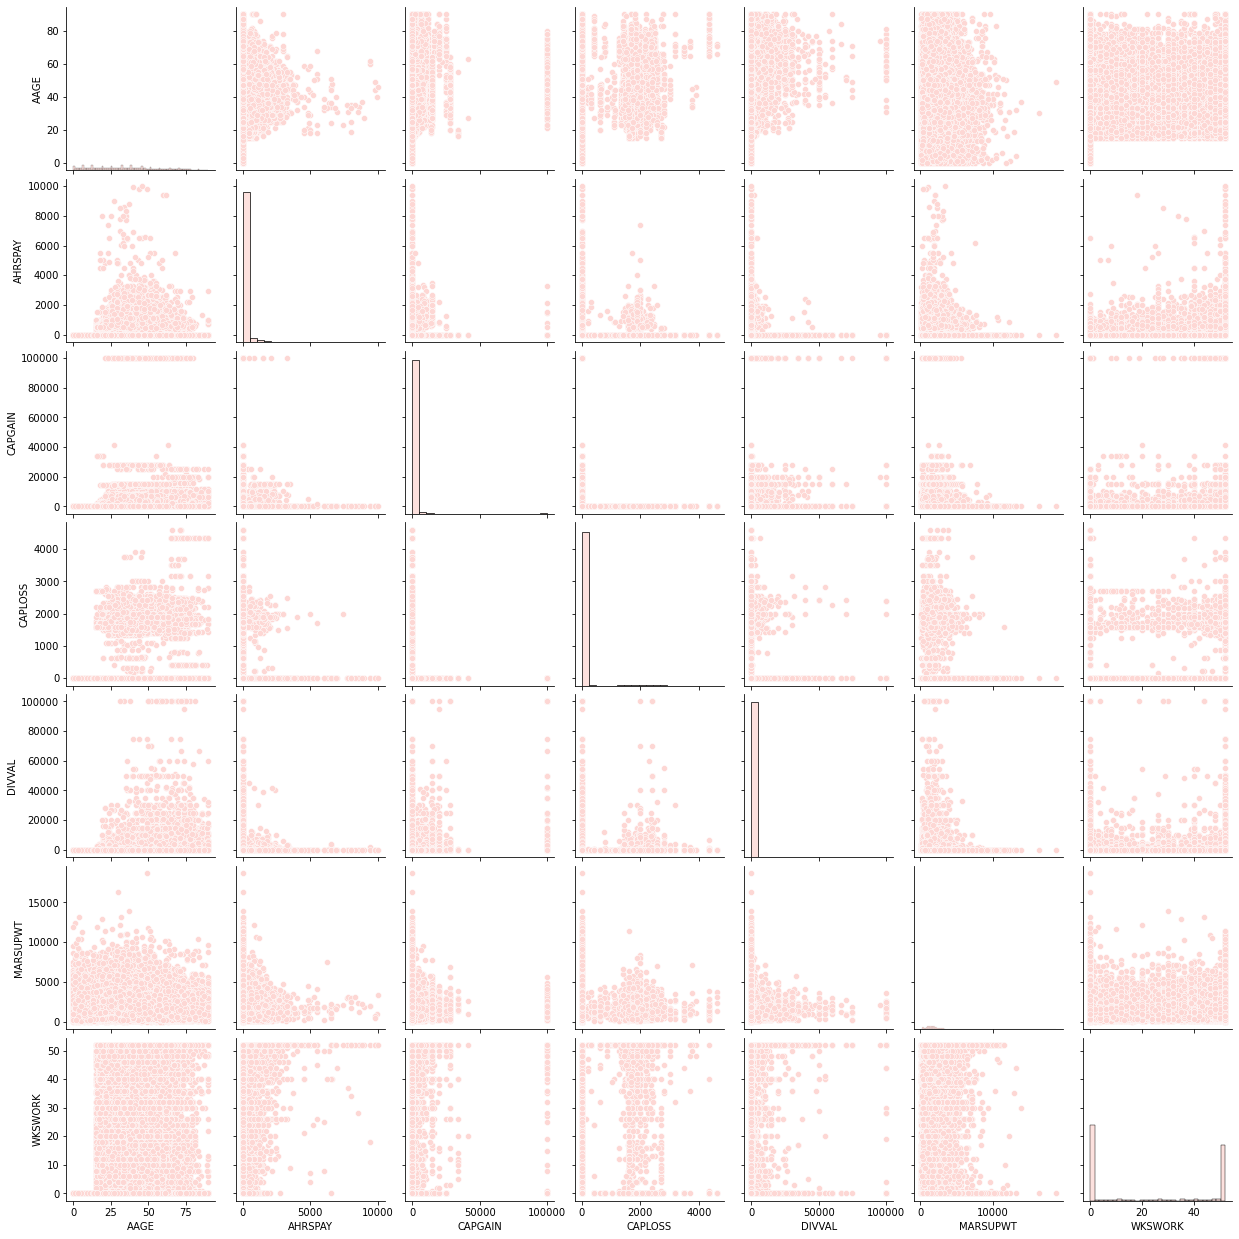

In [35]:
# Create an array with the colors you want to use
colors = ["#FF5733"]
# Set your custom color palette
customPalette = sns.set_palette("RdPu", 5)
sns.pairplot(pairplot_df, height=2.5, palette=customPalette)

In [36]:
# Creating dataframe for Feature and its datatypes
dictionary={}
for i in dq.columns:
    dictionary[i]=dq.dtypes[i]
    
datatypes = pd.DataFrame(list(dictionary.items()),columns = ['FeatureName','DataType'])
datatypes

,FeatureName,DataType
0,AAGE,int32
1,ACLSWKR,object
2,ADTIND,object
3,ADTOCC,object
4,AHGA,object
5,AHSCOL,object
6,AMARITL,object
7,AMJIND,object
8,AMJOCC,object
9,ARACE,object


In [37]:
# Creating list of all integer/float attributes
numerical =[]
for i in dq.columns:
    if dq.dtypes[i] != 'object':
        numerical.append(i)
print(numerical)

['AAGE', 'MARSUPWT', 'WKSWORK', 'YEAR']


<AxesSubplot:>

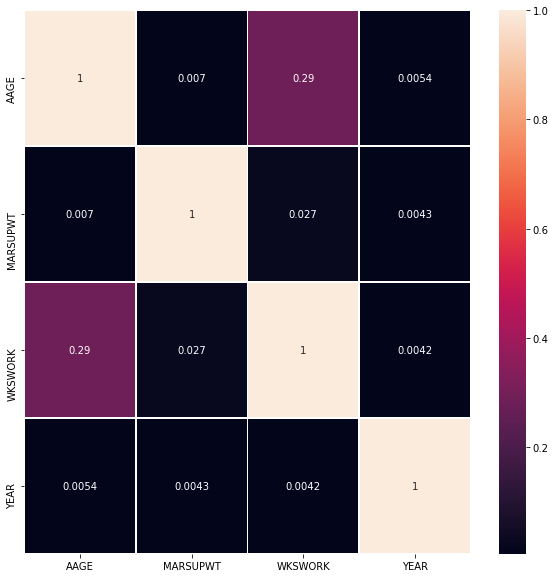

In [38]:
# Creating Correlation Matrix
correlation_df = dq[numerical].corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(correlation_df, annot=True, ax=ax, linewidths=.6)